In [619]:
## Import the Python libraries 
import plotly.express as px ;
import pandas as pd ;
import numpy as np ;
import matplotlib.pyplot as plt ;
import seaborn as sns ;

## Import the CSV coupon file **** Pls change the path according to your local machine path 
df = pd.read_csv('Downloads/AI-ML/Coupon/data/coupons.csv')

In [621]:
## Identify the columns having missing values
df.columns[df.isnull().any()]

Index(['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

In [623]:
## Column & Data cleansing of the Coupon file ##

## 1. The CAR column in the file is > 99% blank and can be dropped from consideration.
df = df.drop(columns=['car']) ;

## 2. Clean up the data in Bar, CoffeeHouse, CarryAway,RestaurantLessThan20, Restaurant20To50
df['Bar'].fillna('never', inplace=True) ;
df['CoffeeHouse'].fillna('never', inplace=True) ;
df['CarryAway'].fillna('never', inplace=True) ;
df['RestaurantLessThan20'].fillna('never', inplace=True) ;
df['Restaurant20To50'].fillna('never', inplace=True) ;

## 3. Rename Colume 'Y' with Acceptance, this denotes coupon acceptance
df.rename(columns={'Y': 'Acceptance'}, inplace=True) ;
 


In [625]:
## Quick check of column data ##
print(df.groupby(["Bar"], dropna=False).size())
print(df.groupby(["CoffeeHouse"], dropna=False).size())
print(df.groupby(["CarryAway"], dropna=False).size())
print(df.groupby(["RestaurantLessThan20"], dropna=False).size())
print(df.groupby(["Restaurant20To50"], dropna=False).size())

Bar
1~3      2473
4~8      1076
gt8       349
less1    3482
never    5304
dtype: int64
CoffeeHouse
1~3      3225
4~8      1784
gt8      1111
less1    3385
never    3179
dtype: int64
CarryAway
1~3      4672
4~8      4258
gt8      1594
less1    1856
never     304
dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
gt8      1285
less1    2093
never     350
dtype: int64
Restaurant20To50
1~3      3290
4~8       728
gt8       264
less1    6077
never    2325
dtype: int64


In [627]:
## Validating the columns and sample dataset 
print(df.columns)
df.head()

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Acceptance'],
      dtype='object')


destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never     never                  4~8              1~3   
1        never     never                  4~8              1~3   
2        never     never                  4~8              1~3   
3        never     never                  4~8              1~3   
4        never     never                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Acceptance  
0             1           1  
1             1           0  
2             1           1  
3             1           0  
4             1           0  

[5 rows x 25 columns]

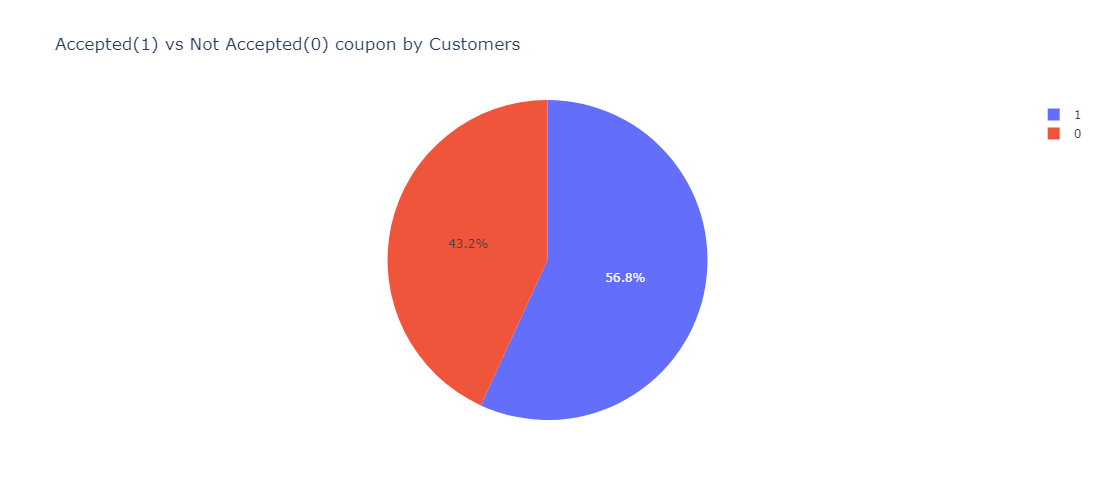

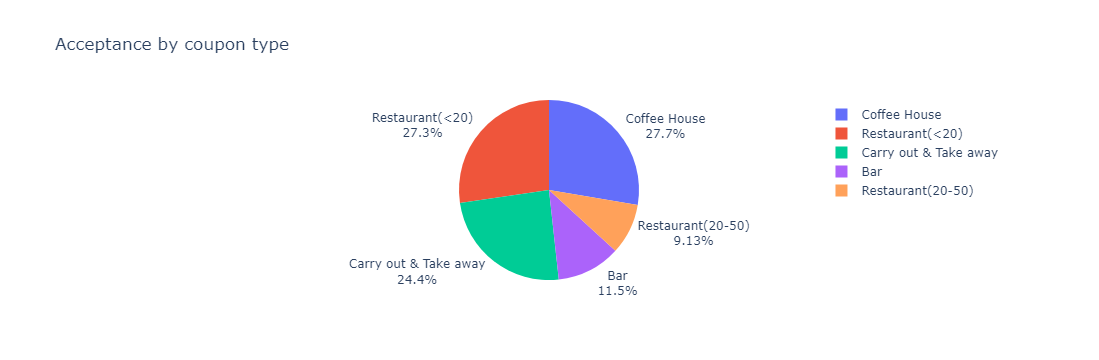

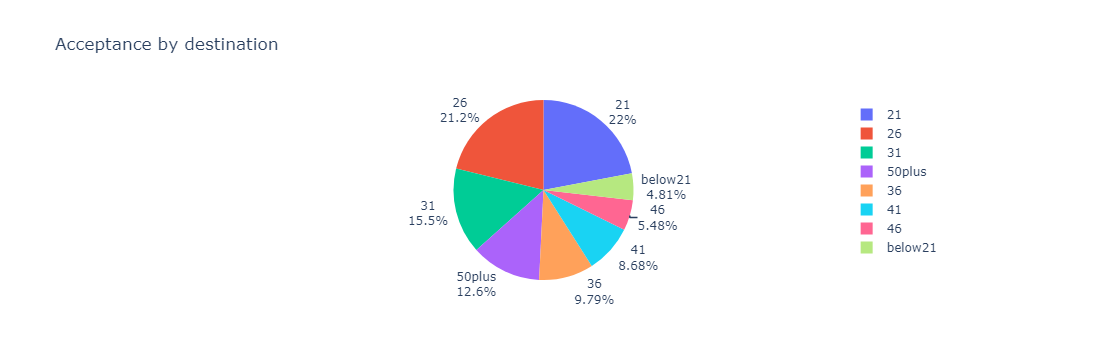

In [629]:
## What proportion of the total observations chose to accept the coupon?
fig = px.pie(df, names= 'Acceptance' ,width=900, height=500,  title='Accepted(1) vs Not Accepted(0) coupon by Customers')
fig.show()

fig = px.pie(df, values='Acceptance', names='coupon', title='Acceptance by coupon type')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

fig = px.pie(df, values='Acceptance', names='age', title='Acceptance by destination')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Observation : 
## 1. ~57% of the customers accepted the coupons of the overall count.
## 2. Carryout, takeaway and restaurants(<20) are most accepted coupons
## 3. Customers traveling to no-urgent places have accepted more coupons.
## 4. The coupon is accepted more by the younger generation.

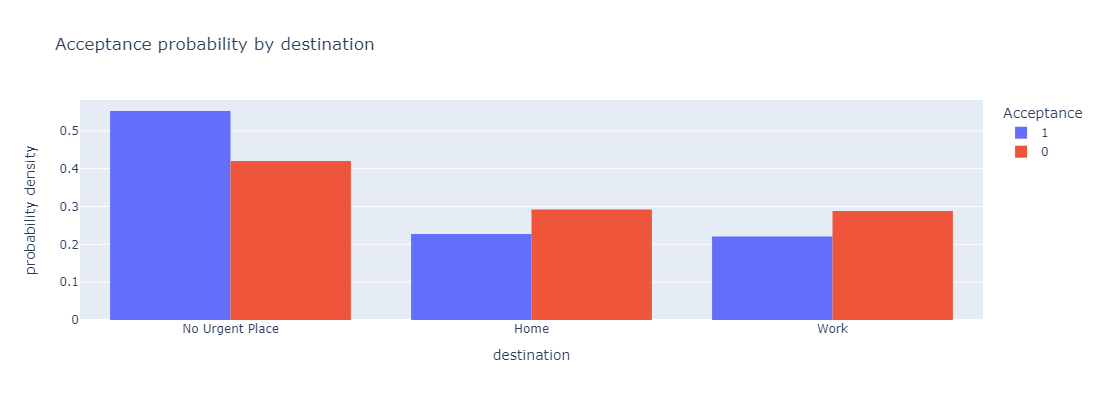

In [631]:
## Probability of coupon acceptance by traveling destination

fig = px.histogram(df, x="destination",barmode='group', histnorm='probability density', color="Acceptance", width=800, height=400, title='Acceptance probability by destination')
fig.show()

## Observation: Acceptance for coupons is more for customers traveling to no urgent destination

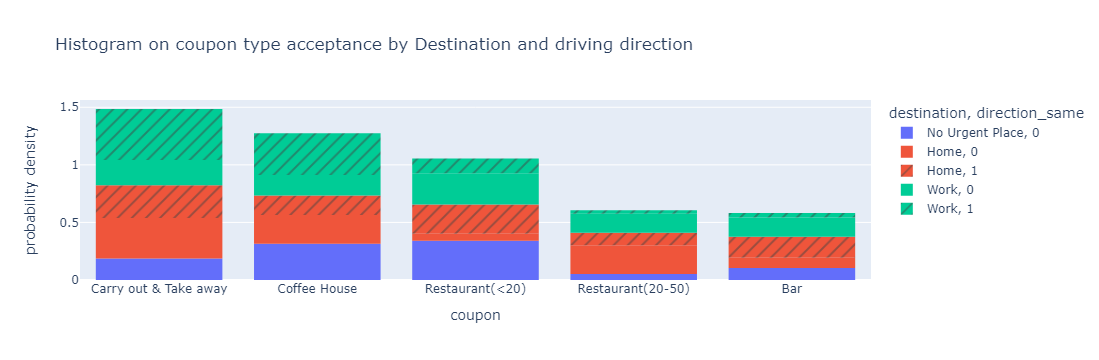

In [633]:
## Coupon type acceptance by destination & driving directions
fig = px.histogram(df.query("Acceptance == 1"), x="coupon", histnorm='probability density', color="destination", pattern_shape='direction_same',title='Histogram on coupon type acceptance by Destination and driving direction').update_xaxes (categoryorder='total descending') 
fig.show()

## Observation : 
## 1. Takeaway is the most accepted coupon, mainly by customers traveling for Work/Home. 
## 2. The acceptance of coupons (Carryout & Takeaway & Coffee) is greater when customers are driving to work.
## 3. Resturant (<20) is mostly accepted by customers traveling to No urgent places.   
## 4. Bar coupons are mostly accepted by customers traveling in the direction of home.
##

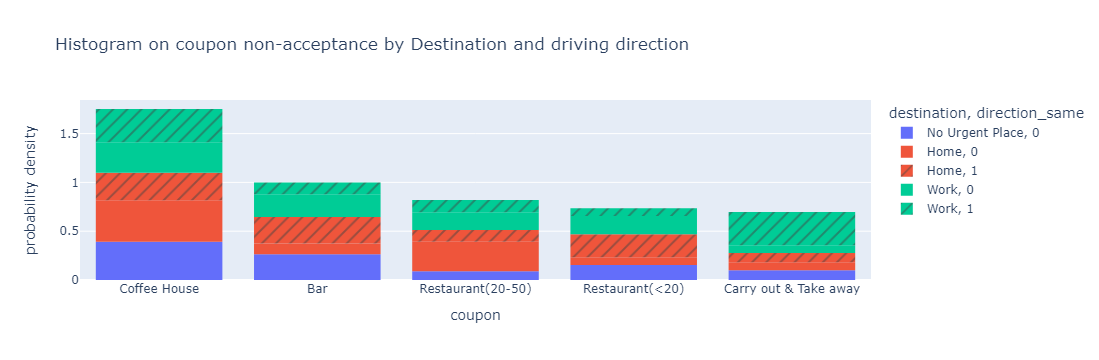

In [635]:
## Coupon type non-acceptance by destination & driving directions
fig = px.histogram(df.query("Acceptance == 0"), x="coupon", histnorm='probability density', color="destination",title='Histogram on coupon non-acceptance by Destination and driving direction', pattern_shape='direction_same').update_xaxes(categoryorder='total descending')
fig.show()
## Observation : 
## 1. Overall all Coffee/ Bar coupons are mostly not accepted by customers.
## 2. Carryout and takeaway are mostly rejected when traveling away from work 
## 3. Restaurants 20-50 are not accepted by customers traveling home.
## 4. Bar coupons are mostly not accepted by customers traveling away from home. 
##

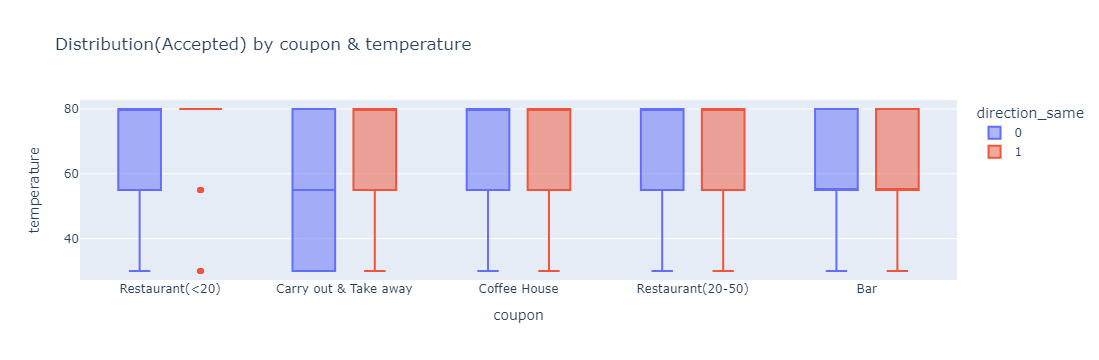

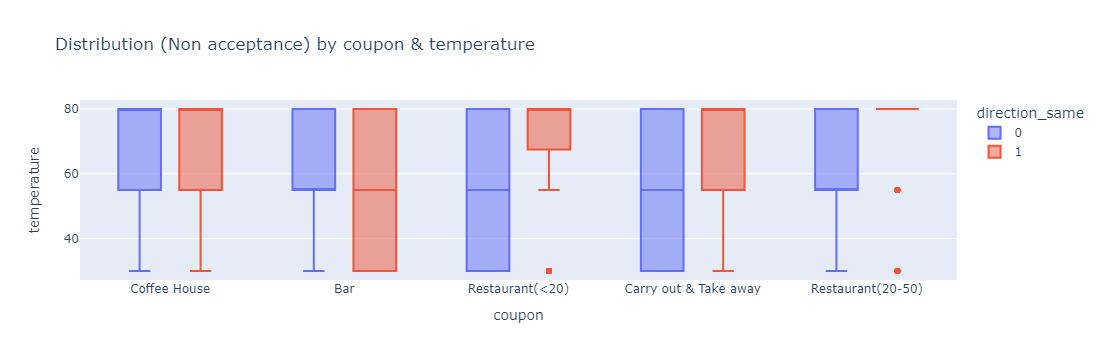

In [637]:
## Coupon types by Temperature for accepted coupons 
fig = px.box(df.query('Acceptance == 1'), x="coupon", y="temperature", color="direction_same", title= 'Distribution(Accepted) by coupon & temperature')
fig.update_traces(quartilemethod="inclusive") 
# "inclusive", or "linear" by default
fig.show()

## Coupon types by Temperature for non-accepted coupons
fig = px.box(df.query('Acceptance == 0'), x="coupon", y="temperature", color="direction_same", title= 'Distribution (Non acceptance) by coupon & temperature')
fig.update_traces(quartilemethod="inclusive") 
# "inclusive", or "linear" by default
fig.show()

## Observation :
## 1. The carryout & takeaway coupons are accepted for all temperature ranges and same direction of the destination, opposite direction is considered when the temperature is high > 50
## 2. Coffee house coupon acceptance or nonacceptance ranges during high temperatures. 
## 4. Non-acceptance of coupons for restaurants < 20 is spread across all temperature ranges for the same direction to destination, however, opposite direction ranges for higher temperature range 
## 



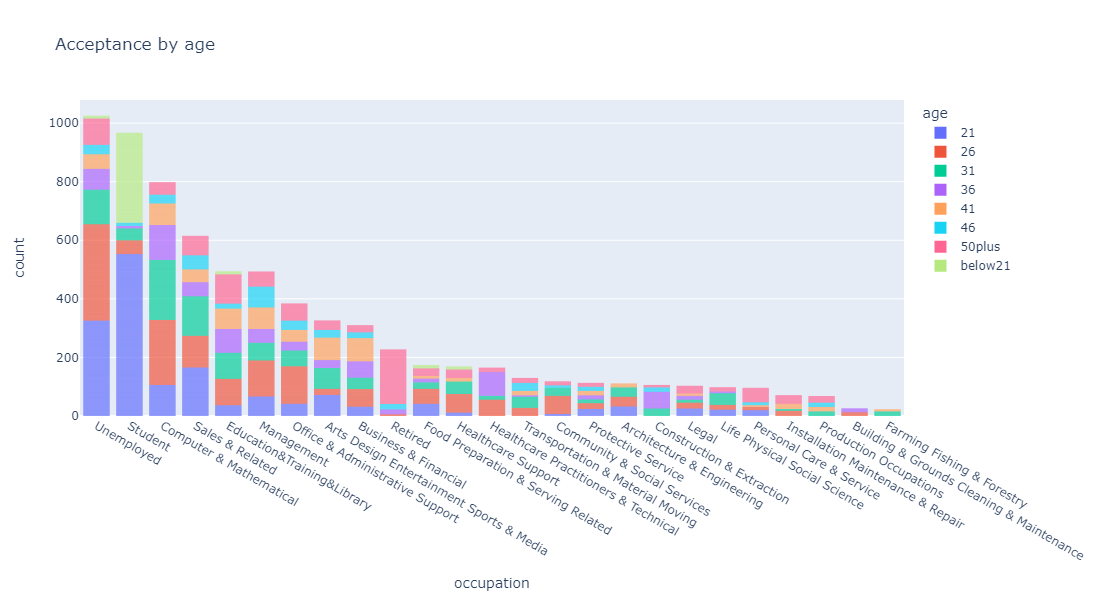

In [639]:
## Coupon acceptance by Age and Occupation
fig = px.bar(df.query('Acceptance == 1').sort_values(by=['age']), x='occupation', color='age',title = 'Acceptance by age', height=600).update_xaxes (categoryorder='total descending')
fig.update_traces(dict(marker_line_width=0))
fig.show()

## Observation : 
## 1. Coupon acceptance is high in the Unemployed and Student category and mostly by younger age groups.
## 2. Acceptance is more for the retired group with an age range of 50plus.  
## 3. The overall acceptance rate is higher for the younger age group than for 50plus  

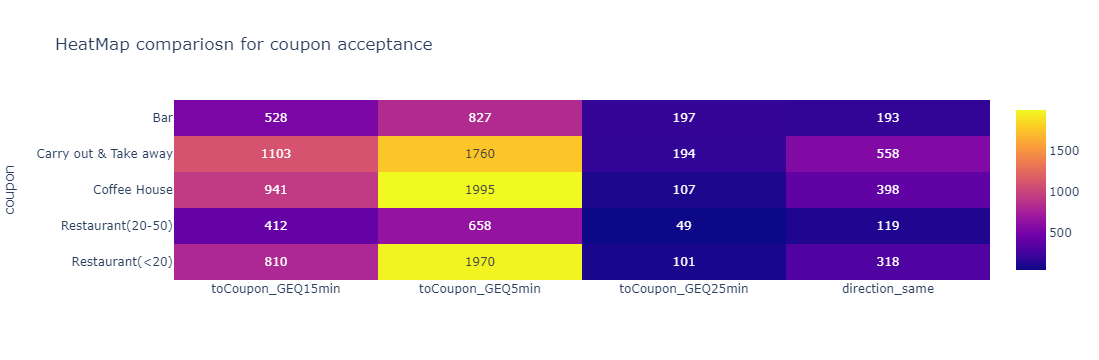

In [640]:
## Heatmap comparison for coupon acceptance

fig = px.imshow(df.query('(Acceptance == 1 & toCoupon_GEQ15min == 1) | (Acceptance == 1 & toCoupon_GEQ5min == 1) | (Acceptance == 1 & toCoupon_GEQ25min == 1) | (Acceptance == 1 & direction_same == 1)').groupby(by=['coupon'])[['toCoupon_GEQ15min', 'toCoupon_GEQ5min','toCoupon_GEQ25min','direction_same']].sum(), title='HeatMap compariosn for coupon acceptance', text_auto=True, aspect="auto")
fig.show()

## Observations: 
## 1. Nearby restaurants has very high chances of coupon acceptance across all the category
## 2. The farthest restaurants GE 25min are least accepted by customers 


In [641]:
#### *** Investigating the Bar Coupons ****

In [642]:
## Dataframe dfb with just the Bar coupons ## 
dfb = df.query('coupon == "Bar"')

In [647]:
##### Hypothesis about drivers who accepted the bar coupons ##### 
##### ****************************************************** #####

## The number of customers who accepted the Bar coupon is 41%
## Gender distribution of coupon acceptance is almost equal.
## The Younger generation with an age group <30 has a high rate of Bar coupon acceptance.
## Coupons with expiration date of 1d have very high acceptance ~75% compared to 2hr.  
## Students as well as unemployed customers have a high acceptance rate of Bar coupons.  
## The customers in the Computer and Mathematical profession with children have a high acceptance rate for Bar coupons. 
## Art Design, entertainment, and sports profession customers who have visited the Bar gt8 have accepted the coupon more.
## Customers without children have visited the bar more times gt8 and have accepted the coupons. 
## Customers with education Highschool have accepted and visited 1~3 time the Bar
## Bar coupon acceptance rate is high for nearby restaurants
## Singles & Married partners across the salary range have accepted the Bar coupons.
## Divorced and Widows have least accepted the Bar coupons. 
## Targeting the above audience will result in high acceptance of Bar coupons.
## *** Supporting plots are listed below ***

## Hypothesis: Based on my observations of the plots, I believe that giving coupons to the audience above will result in a high acceptance rate and usage 
## of the coupons.



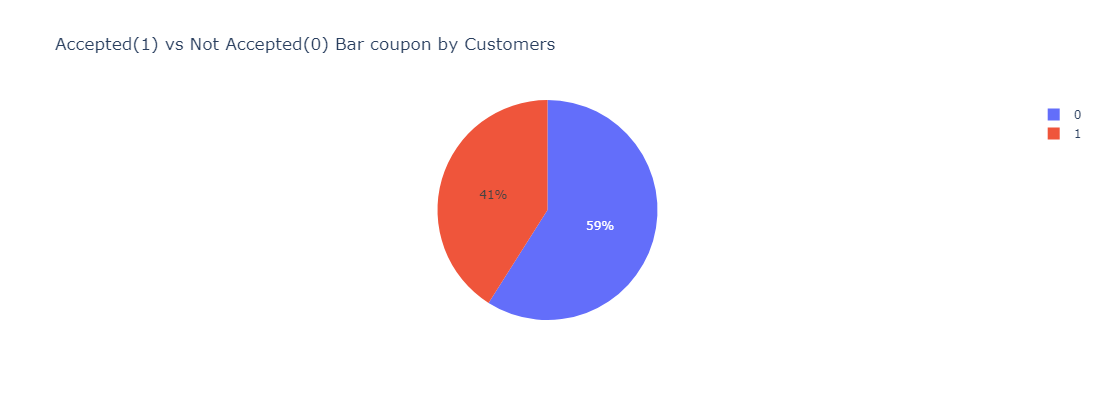

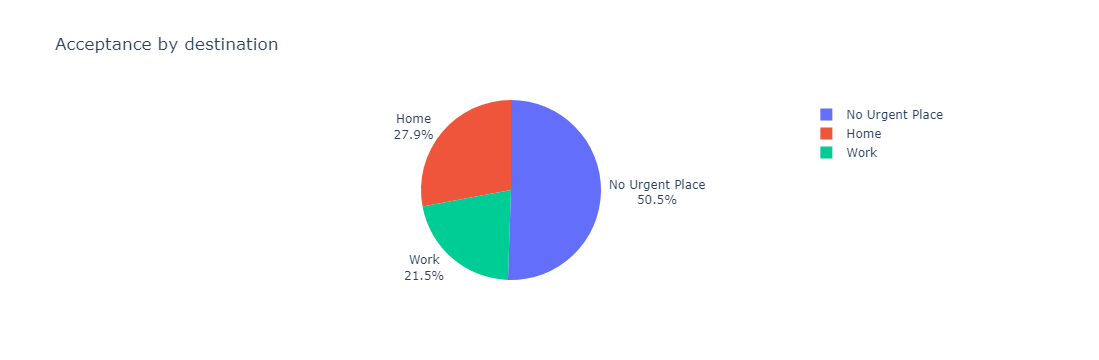

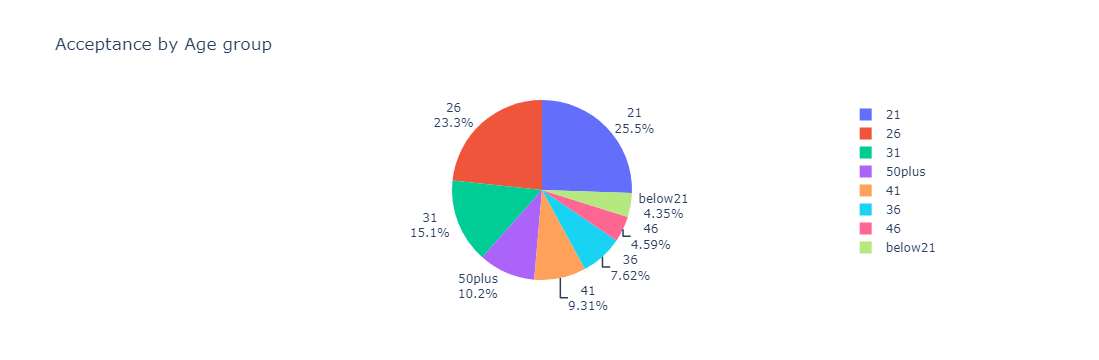

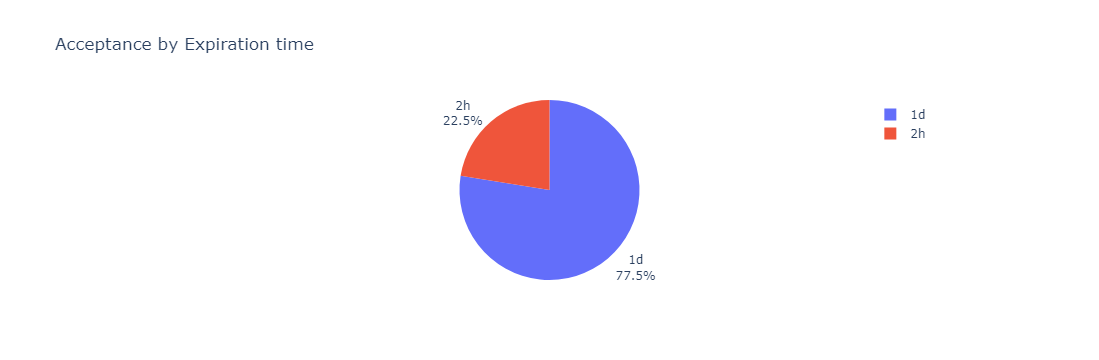

In [649]:
## Percent of acceptance of Bar coupon and probability distribution by destination

fig = px.pie(dfb, names= 'Acceptance' ,width=800, height=400,  title='Accepted(1) vs Not Accepted(0) Bar coupon by Customers')
fig.show()  

## What proportion of the total observations chose to accept the coupon?

fig = px.pie(dfb, values='Acceptance', names='destination', title='Acceptance by destination')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

fig = px.pie(dfb, values='Acceptance', names='age', title='Acceptance by Age group')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

fig = px.pie(dfb, values='Acceptance', names='expiration', title='Acceptance by Expiration time')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


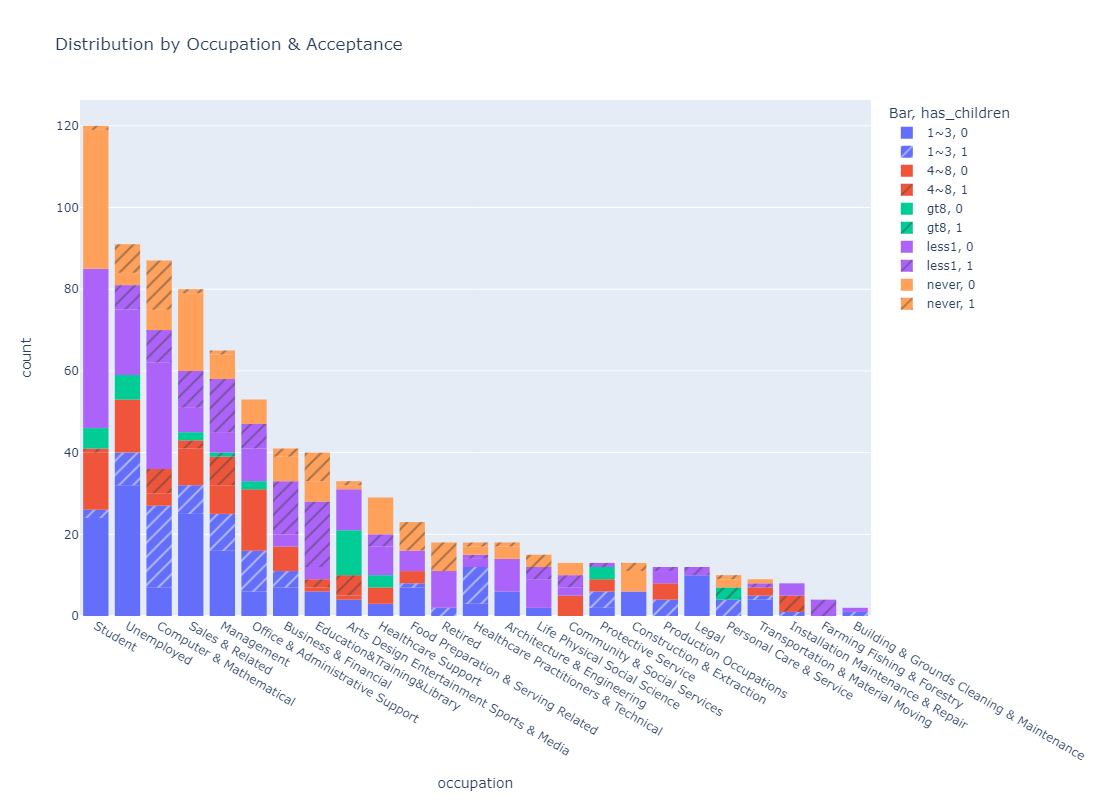

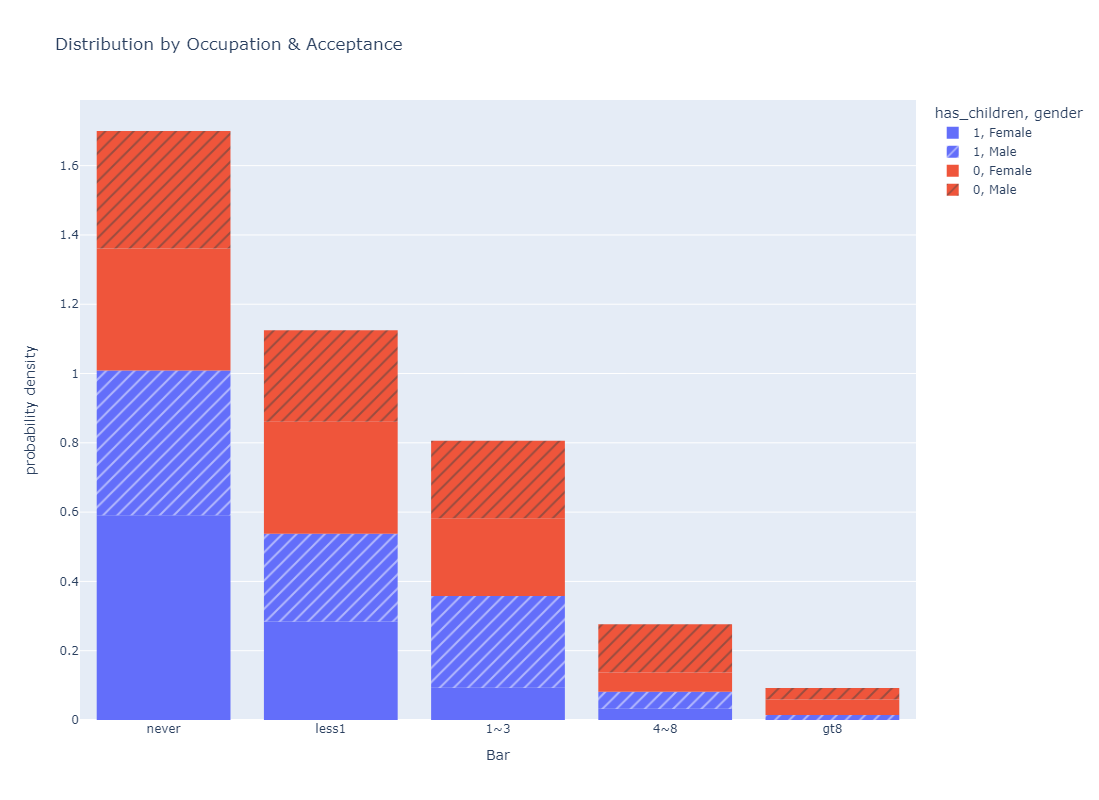

In [651]:
fig = px.histogram(dfb.query('Acceptance == 1').sort_values(by=['Bar']), x="occupation", color="Bar", pattern_shape='has_children',width=1000, height=800, title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending') 
fig.show()

fig = px.histogram(dfb, x="Bar", histnorm='probability density', color="has_children", pattern_shape='gender',width=1000, height=800, title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending') 
fig.show()


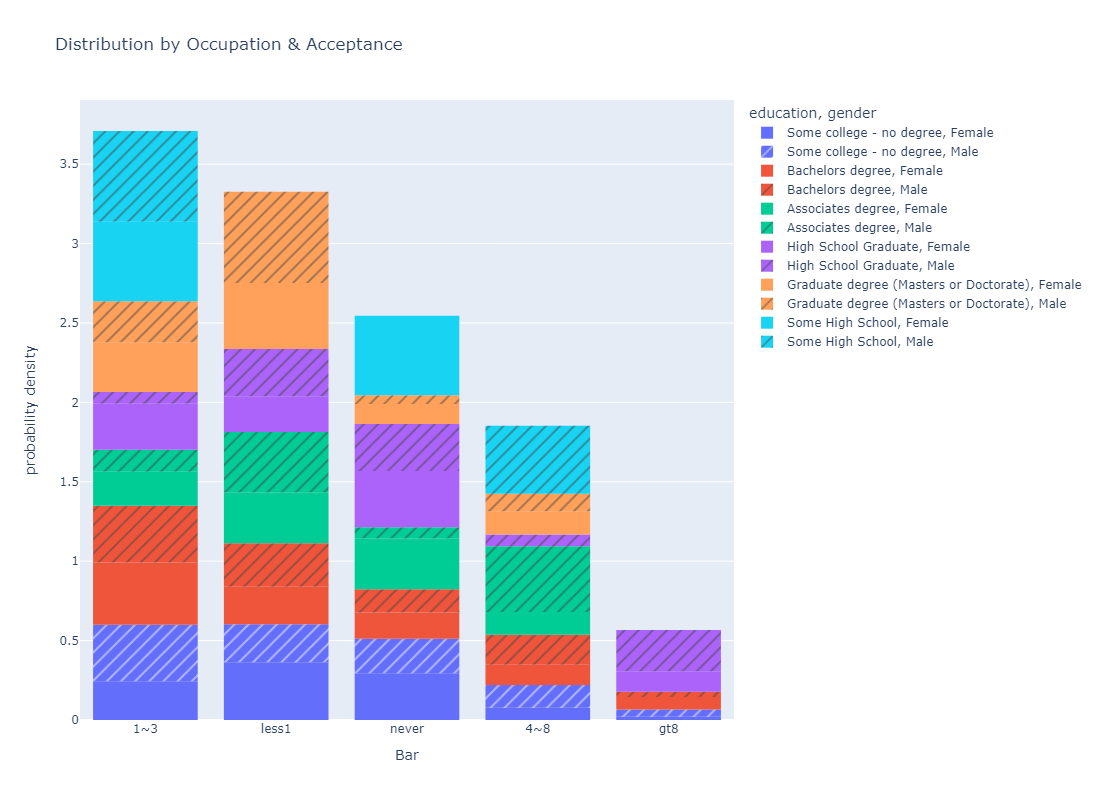

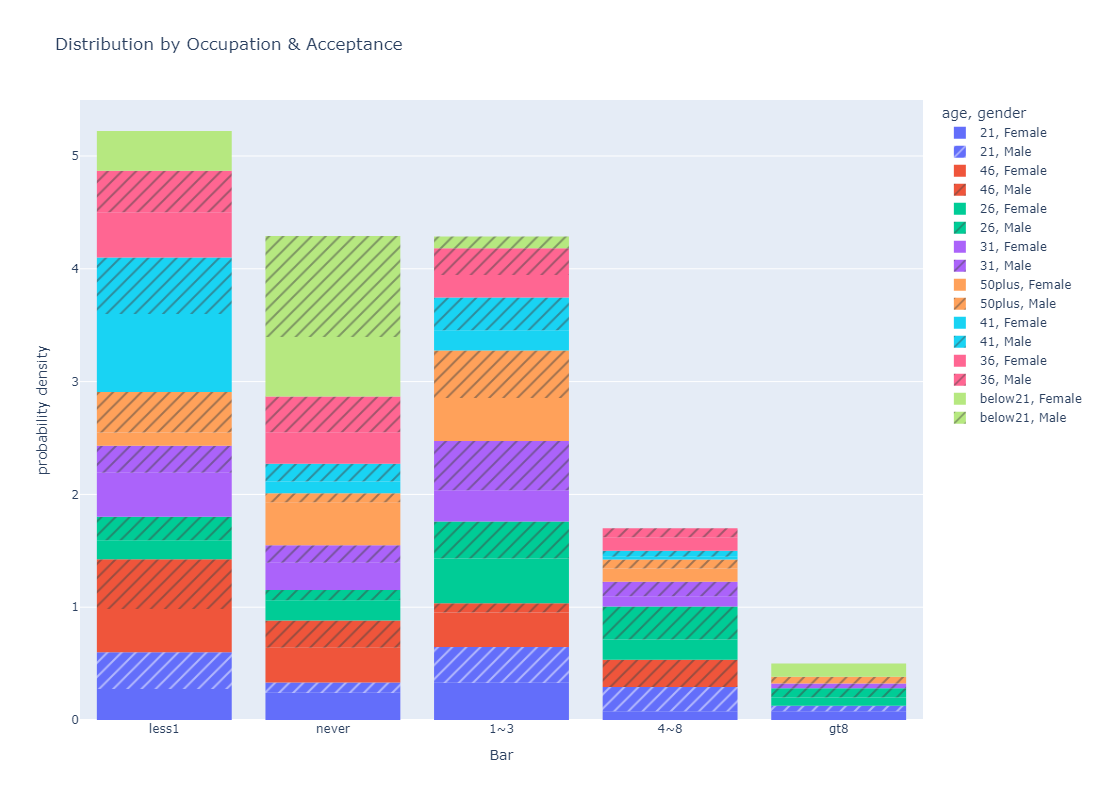

In [653]:
fig = px.histogram(dfb.query('Acceptance == 1'), x="Bar", histnorm='probability density', color="education", pattern_shape='gender', width=1000, height=800,title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending') 
fig.show()
fig = px.histogram(dfb.query('Acceptance == 1'), x="Bar", histnorm='probability density', color="age", pattern_shape='gender', width=1000, height=800,title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending')
fig.show()


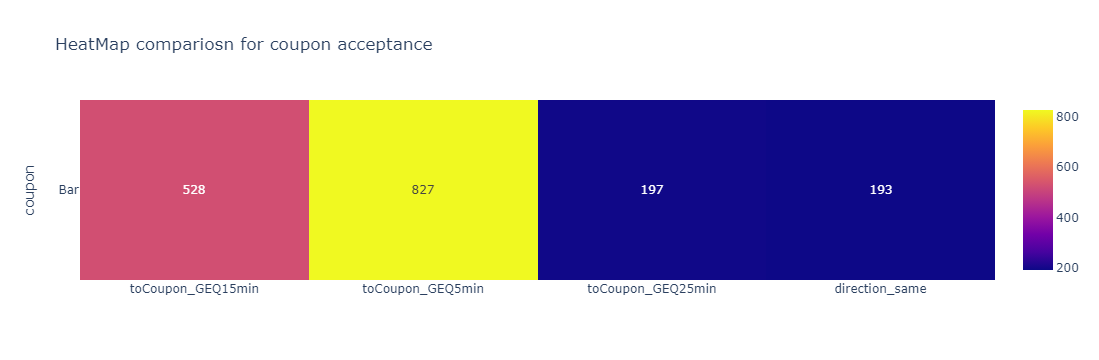

In [655]:
fig = px.imshow(dfb.query('(Acceptance == 1 & toCoupon_GEQ15min == 1) | (Acceptance == 1 & toCoupon_GEQ5min == 1) | (Acceptance == 1 & toCoupon_GEQ25min == 1) | (Acceptance == 1 & direction_same == 1)').groupby(by=['coupon'])[['toCoupon_GEQ15min', 'toCoupon_GEQ5min','toCoupon_GEQ25min','direction_same']].sum(), title='HeatMap compariosn for coupon acceptance', text_auto=True, aspect="auto")
fig.show()

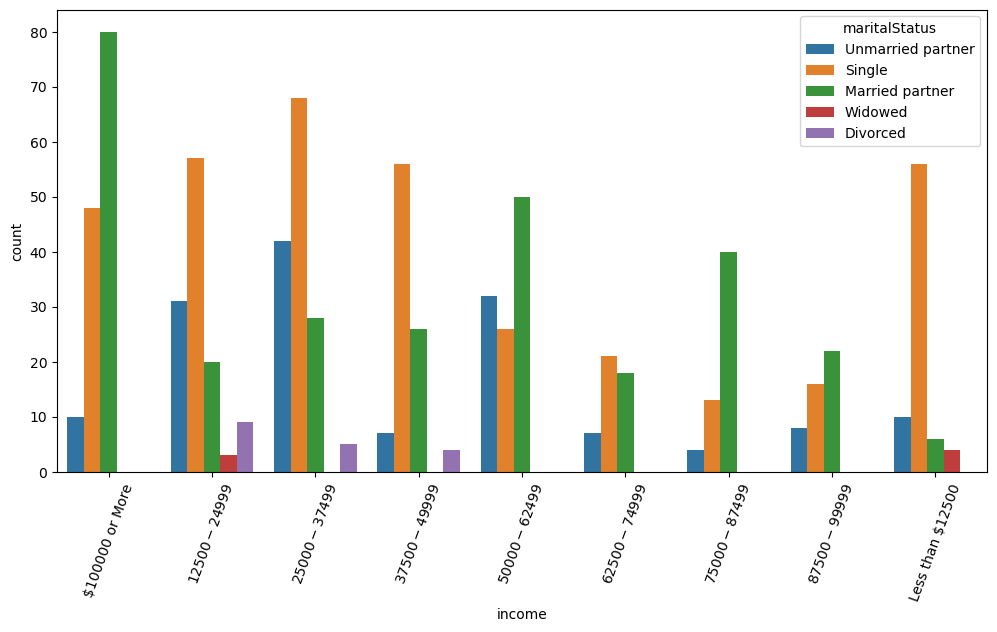

In [657]:
dfbi = dfb.query('Acceptance == 1').groupby('income')[['income', 'maritalStatus']].value_counts(ascending=True).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=dfbi, x=dfbi['income'], y='count', hue=dfbi['maritalStatus'])
plt.xticks(rotation=70)
plt.show()


In [659]:
#### *** Investigating the Coffee house Coupons **** 

In [661]:
## Dataframe dfb with just the Coffee House coupons ## 
dfc = df.query('coupon == "Coffee House"')
dfc.head()

destination  passanger weather  temperature  time        coupon  \
1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15             Home      Alone   Sunny           80   6PM  Coffee House   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
1          2h  Female  21  Unmarried partner  ...        never     never   
3          2h  Female  21  Unmarried partner  ...        never     never   
4          1d  Female  21  Unmarried partner  ...        never     never   
12         2h  Female  21  Unmarried partner  ...        never     never   
15         2h  Female  21  Unmarried partner  ...        never     never   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
1                   4~8              1~3                1                 0   
3                   4~8              1~3                1                 1   
4                   4~8              1~3                1                 1   
12                  4~8              1~3                1                 1   
15                  4~8              1~3                1                 0   

   toCoupon_GEQ25min direction_same direction_opp  Acceptance  
1                  0              0             1           0  
3                  0              0             1           0  
4                  0              0             1           0  
12                 0              0             1           1  
15                 0              0             1           0  

[5 rows x 25 columns]

In [663]:
##### Hypothesize about drivers who accepted the coffee house coupons ##### 

## The number of customers who accepted the coffeehouse coupon is ~50 %
## Gender distribution of coupon acceptance is almost equal.
## Customers visiting non-urgent places have an acceptance rate compared to traveling home/work
## Although the coupon is being accepted by all age groups, however, younger generation < 31 years of age has a high acceptance rate.
## Students, un-employed customers & computer & mathematics occupation has acceptance rate of Coffee coupons
## The Customers in the Computer and Mathematical profession with children have a high acceptance rate for coupons
## Younger generation < 31 years of age customers who have visited the Bar gt8 have accepted the coupon.
## Customers with education Highschool or high school graduates have high acceptance and visited 1~3 time the Bar
## Coffe house coupon acceptance rate is very high for nearby restaurants.
## Singles & Married partners across the salary range have accepted the coffeehouse coupons
## Divorced and Widows have least accepted the coffee house coupons
## Targeting the above audience will result in high acceptance of Coffee House coupons.
## *** Supporting plots are listed below ***

## Hypothesis: Based on my observations of the plots, I believe that giving coupons to the audience above will result in a high acceptance rate and usage 
## of the coupons.

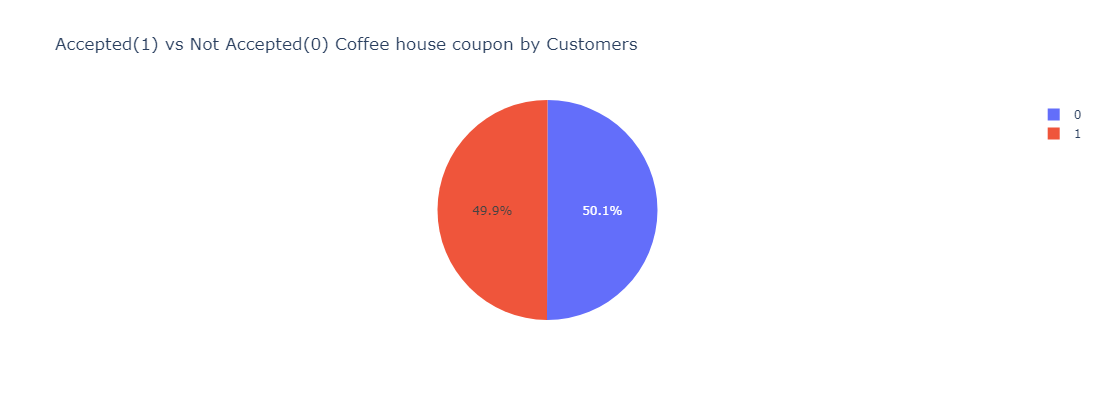

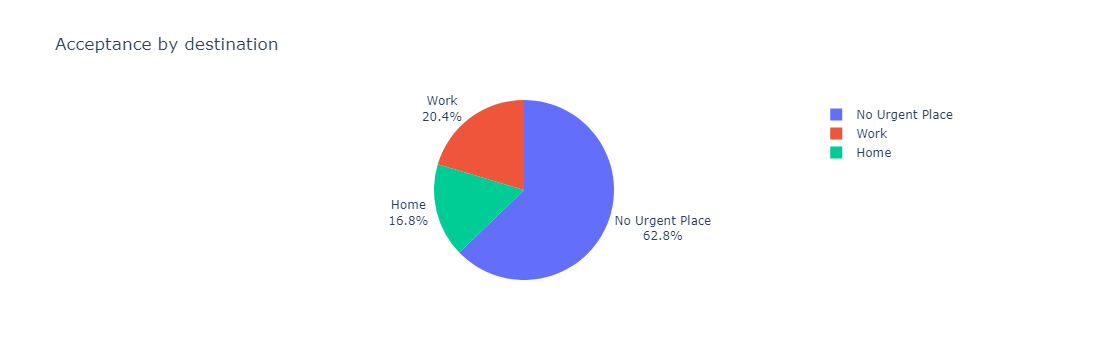

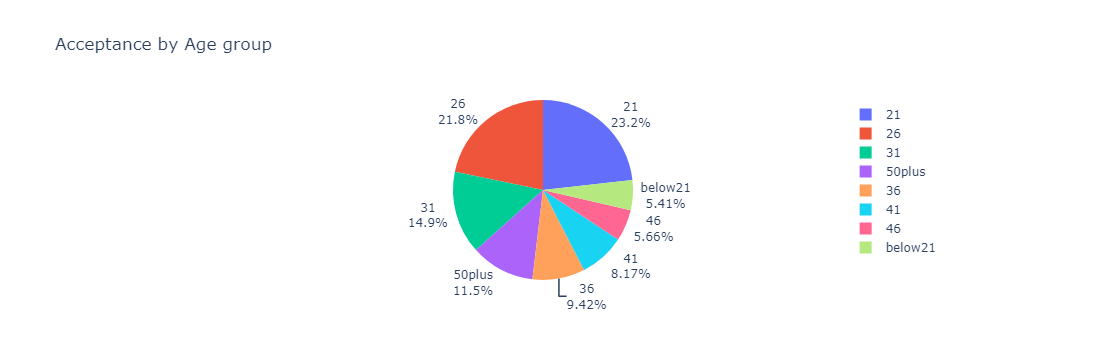

In [665]:
## Percent of acceptance of Coffee house coupon and distribution by destination and age group

fig = px.pie(dfc, names= 'Acceptance' ,width=800, height=400,  title='Accepted(1) vs Not Accepted(0) Coffee house coupon by Customers')
fig.show()

## What proportion of the total observations chose to accept the coupon?

fig = px.pie(dfc, values='Acceptance', names='destination', title='Acceptance by destination')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

fig = px.pie(dfc, values='Acceptance', names='age', title='Acceptance by Age group')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()


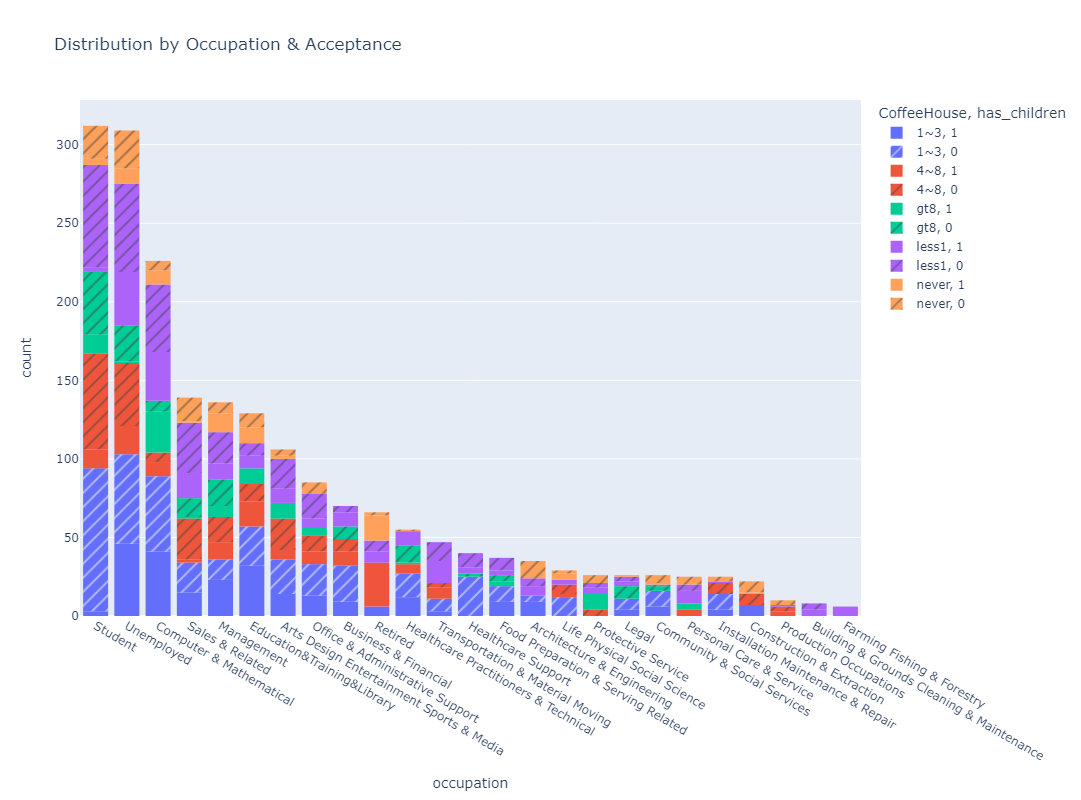

In [667]:
## Coffee House Coupon distribution by occupation and acceptance ##
fig = px.histogram(dfc.query('Acceptance == 1').sort_values(by=['CoffeeHouse']), x="occupation", color="CoffeeHouse", pattern_shape='has_children',width=1000, height=800, title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending') 
fig.show()

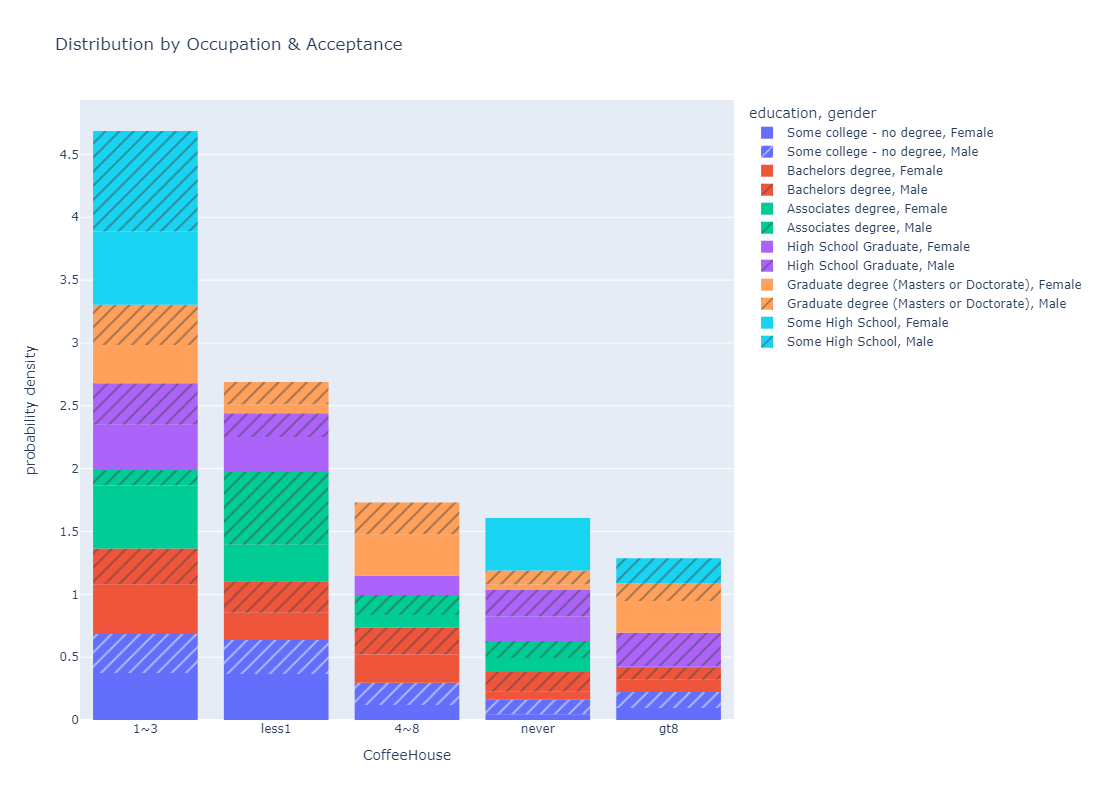

In [669]:

##Coffee house Coupon by education and gender ## 
fig = px.histogram(dfc.query('Acceptance == 1'), x="CoffeeHouse", histnorm='probability density', color="education", pattern_shape='gender', width=1000, height=800,title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending') 
fig.show()

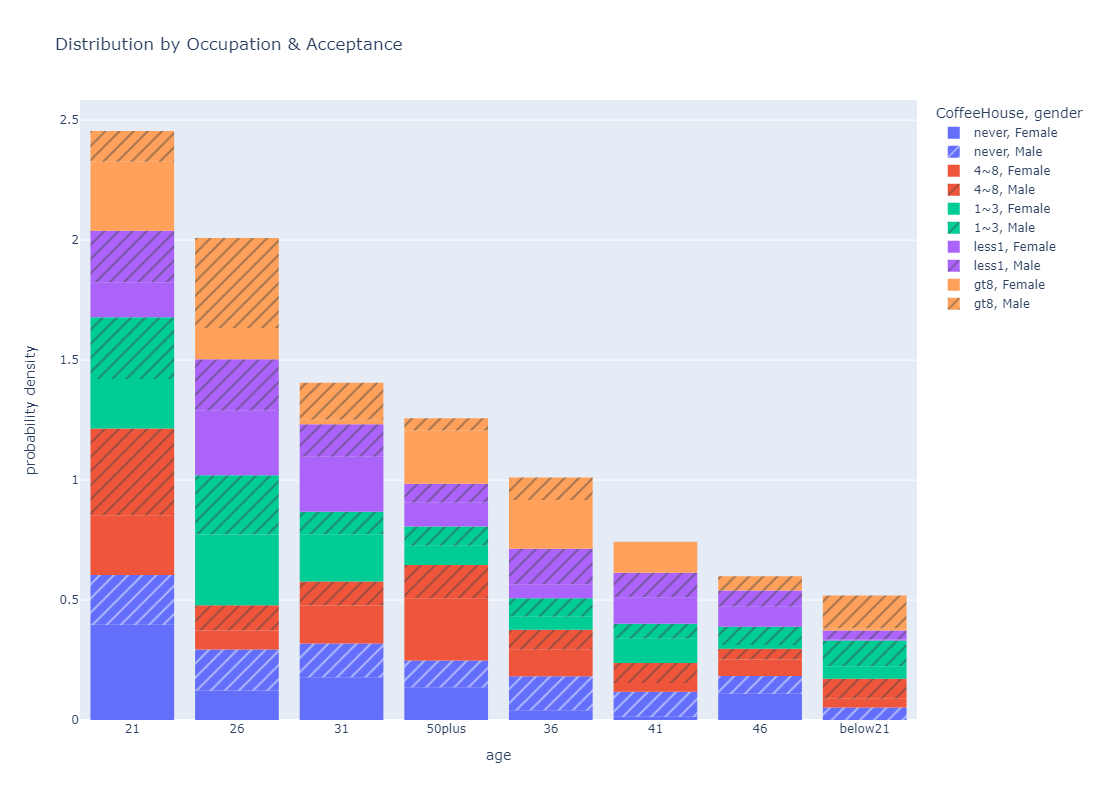

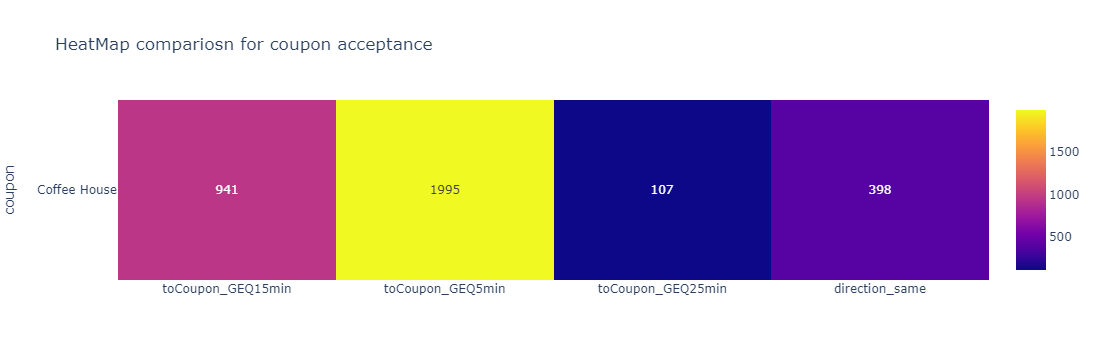

In [671]:
fig = px.histogram(dfc.query('Acceptance == 1'), x="age", histnorm='probability density', color="CoffeeHouse", pattern_shape='gender', width=1000, height=800,title='Distribution by Occupation & Acceptance').update_xaxes(categoryorder='total descending')
fig.show()

fig = px.imshow(dfc.query('(Acceptance == 1 & toCoupon_GEQ15min == 1) | (Acceptance == 1 & toCoupon_GEQ5min == 1) | (Acceptance == 1 & toCoupon_GEQ25min == 1) | (Acceptance == 1 & direction_same == 1)').groupby(by=['coupon'])[['toCoupon_GEQ15min', 'toCoupon_GEQ5min','toCoupon_GEQ25min','direction_same']].sum(), title='HeatMap compariosn for coupon acceptance', text_auto=True, aspect="auto")
fig.show()

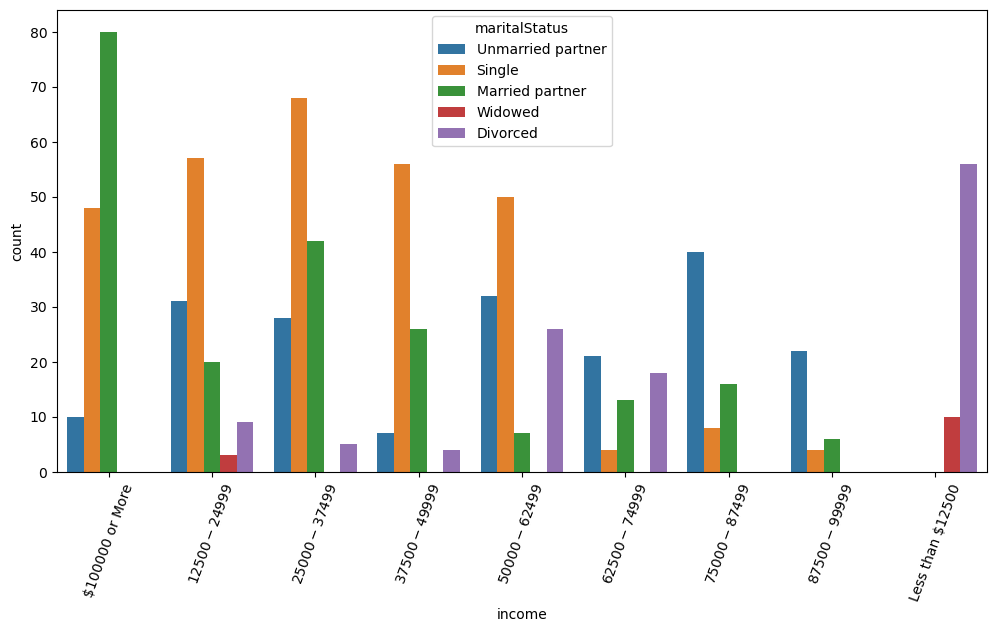

In [673]:
dfci = dfc.query('Acceptance == 1').groupby('income')[['income', 'maritalStatus']].value_counts(ascending=True).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=dfbi, x=dfci['income'], y='count', hue=dfci['maritalStatus'])
plt.xticks(rotation=70)
plt.show()